##  QUESTO E' IL FILE DI RIDUZIONE VERO DI FEDERICO PIGNALBERI
#### I coeeficienti nelle funzioni di seguito sono ottenuti da una procedura di calibrazione, necessaria perche' le curve che si ottengono non sono lineari

In [4]:
def horizontal_calibration(volt):
    '''
    input:
        Voltage (must be offsetted)
    Return: 
        Force (KN)
    '''
    x=np.array(volt)
    coefficients = np.array([-4.63355231e-02, -2.57055418e+00,  2.63055688e+01, -9.61932787e+01,
            1.64685122e+02, -1.33648859e+02,  4.66773182e+01,  1.63975941e+02,
            9.32438525e-02])
    hor_calibration = np.poly1d(coefficients)
    force = hor_calibration(x)   
    return force

def vertical_calibration(volt):
    '''
    input:
        Voltage (must be offsetted)
    Return: 
        Force (KN)
    '''
    x=np.array(volt)
    coefficients = np.array([ -0.5043737 ,   4.27584024, -11.70546934,   5.45745069,
            29.43390033, -60.90428874,  60.98729795, 124.19783947,
            -0.47000267])
    vert_calibration = np.poly1d(coefficients)
    force = vert_calibration( x)
    return force
######################## ELASTIC CORRECTION FUNCTIONS
def VerticalStiffness (force):
    '''
    input:
        Force (in KN)
    Return: 
        Stiffness array
    '''
    coefficients = np.array([ 3.35241499e-30, -9.37367134e-27,  1.19440060e-23, -9.17845027e-21,
            4.74088379e-18, -1.73500082e-15,  4.61575497e-13, -9.00528796e-11,
            1.28295415e-08, -1.31327065e-06,  9.38895324e-05, -4.50176164e-03,
            1.38008389e-01, -2.63525139e+00,  3.57750394e+01,  1.71503762e+01])
    calibration = np.poly1d(coefficients)
    stiffness = calibration(force)
    return stiffness

def HorizontalStiffness (force):
    '''
    input:
        Force (in KN)
    Return: 
        Stiffness array
    '''
    coefficients = np.array([ 2.43021220e-31, -7.73507440e-28,  1.10791696e-24, -9.43050473e-22,
            5.30556343e-19, -2.07533887e-16,  5.77817817e-14, -1.15148744e-11,
            1.62528123e-09, -1.57483543e-07,  9.75756659e-06, -3.16390679e-04,
            1.96801181e-04,  2.69515293e-01,  5.53939566e+00,  4.21560673e+01])
    calibration = np.poly1d(coefficients)
    stiffness = calibration(force)
    return stiffness


def NonlinearElasticCorrection(stress,disp,k):
    '''
    input:
        force
        disp
        k = stiffness
    Return: 
        elestic corrected displacement
    '''
    from pandas.core.series import Series
    k = k[:-1]
    # Type conversion from Pandas to NumPy
    if type(stress) == type(Series()):
        stress = stress.values
    if type(disp) == type(Series()):
        disp = disp.values    
    # Increments in elastic distortion
    dload = (stress[1:] - stress[:-1]) / k
    # Increments in total displacement
    ddisp = disp[1:] - disp[:-1]
    # Subtract elastic distortion from total displacement
    ec_disp = np.hstack([0, np.cumsum(ddisp - dload)])
    return ec_disp

import os
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0,'/home/federico/PythonModules/rawPy-master/RawPy')
import rawPy as rp


In [5]:
exp_name = 's0144sa03min22'
#######################################

path = os.getcwd()
df = rp.load_tdms('%s/%s.tdms'%(path,exp_name))
df

calibration_v = 100 # insert the calibration value used
calibration_h = 100 # insert the calibration value used
v_volt = df.Vertical_Load/calibration_v
n_volt = df.Horizontal_Load/calibration_h

#plt.plot (df.Vertical_Load,'b')
vertical_load = vertical_calibration(v_volt-v_volt[0])
vertical_load = vertical_load - vertical_load[0]

horizontal_load = horizontal_calibration(n_volt-n_volt[0])
horizontal_load = horizontal_load + horizontal_load[0]

----------------------------
--- experimental details ---

name: s014403min22
Experiment_Name: s014403min22
Operator: Fede
Manufacturer: Leeman Geophysical LLC
Apparatus: BRAVA2
Start_Datetime: Friday, June 21, 2024 3:09:54 PM
Software_Version: 0.1.0
Starting PID Settings: Vertical Displacement P:  1.000000
Vertical Displacement I:  0.000000
Vertical Displacement D:  0.000000
Horizontal Displacement P:  1.000000
Horizontal Displacement I:  0.000000
Horizontal Displacement D:  0.000000
PPa Displacement P:  1.000000
PPa Displacement I:  0.000000
PPa Displacement D:  0.000000
PPb Displacement P:  1.000000
PPb Displacement I:  0.000000
PPb Displacement D:  0.000000
Pc Displacement P:  1.000000
Pc Displacement I:  0.000000
Pc Displacement D:  0.000000
Vertical Load P:  0.000000
Vertical Load I:  0.000000
Vertical Load D:  0.000000
Horizontal Load P:  0.000000
Horizontal Load I:  0.000000
Horizontal Load D:  0.000000
PPa Load P:  0.000000
PPa Load I:  0.000000
PPa Load D:  0.000000
PPb Load 

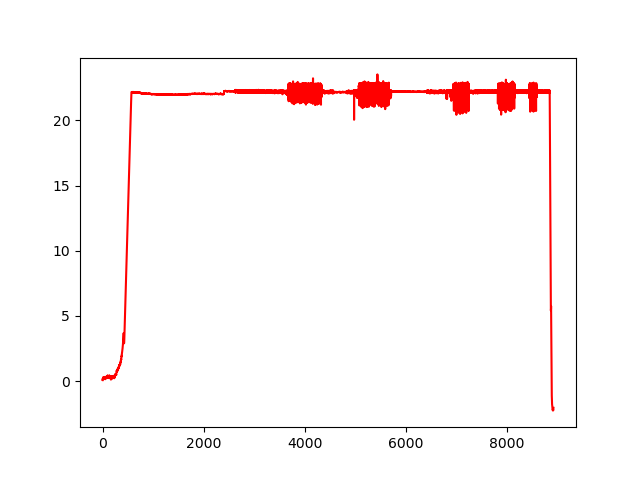

In [6]:
#plt.plot(df.Time,df.Pore_B_Pressure)
#plt.twinx()
#plt.plot(df.Time,horizontal_load/2.5,c='k')
%matplotlib widget
#plt.plot(df.Time,(df.AUX_3-df.AUX_3[1000])*200,c='k',label='right')
#plt.plot(df.Time,(df.AUX_4-df.AUX_4[1000])*200,c='r',label='left')
#plt.legend()
plt.figure()
plt.plot(df.Time,(horizontal_load/2.5),c='r')

In [7]:
offset_h = (np.mean((horizontal_load/2.5)[-10::])- np.mean((horizontal_load/2.5)[0:10]))
offset_v = (np.mean((vertical_load/2.5)[-10::])- np.mean((vertical_load/2.5)[0:10]))
#offsett_v = np.mean((vertical_load/2.5)[-10:])
#offset = (offsett_h - offsett_v)
#offset_v

In [8]:
plt.plot(vertical_load/2.5,c='k')

In [9]:
plt.plot(df.AUX_2,c='k')

In [10]:
#### Vertical stress ###
#### This is the point at which the ram contacted the blocks and load shear loading began

beg_row_v = 2808
##################################

# ZERO DATA
v_load = rp.zero(vertical_load,beg_row_v)
# add in force from the central block due to gravity 
# v_load = v_load + 0.044 #[kN]
# remove noise before load is applied
v_load[:beg_row_v]= v_load[:beg_row_v]*0
# calculate stress for DDS 5x5
v_load = v_load-offset_v

shear_stress_MPa = v_load/(2*1000*0.0025)
#del v_load
# fig=plt.figure(figsize=(15,6))
# plt.plot(df.Time, shear_stress_MPa)
# plt.ylabel('Shear stress [MPa]')
# plt.xlabel('Time [s]')
# plt.tight_layout()

# ### 3. Correct for elastic strech of the vertical frame   
# 
# | Verical stiffness | applied load | k[MPa/mm] | calibration date | 
# | --- | --- | --- | --- |  
# | 359.75 [kN/mm] | < 50 [kN] | 116.801 [MPa/mm] | 19/11/2015 | 
# | 928.5 [kN/mm] | > 50 [kN] | 301.461 [MPa/mm] | 19/11/2015 | 
# 
# Note:  
# 1. These values are calculated for a 5x5[cm] shear surface  
# 2. Stiffness is non linear at low applied loads  
# TO DO: implement a function that corrects for non-linear stiffness

In [11]:
vertical_force = []
for i in range (0,len(v_load)):
    if v_load[i]>0:
        vertical_force.append(v_load[i])
    else:
        vertical_force.append(0)
vertical_force = np.array(vertical_force)
#### vertical disp ####
lp_disp_mm = rp.zero(df.Vertical_Displacement,beg_row_v) #to have it it mm
lp_disp_mm[:beg_row_v] = lp_disp_mm[:beg_row_v]*0
lp_disp_mm = lp_disp_mm/1000

#rp.plot(df.Time,shear_stress_MPa,'Time [s]','Shear stress [MPa]')
#rp.plot(df.Time,lp_disp_mm,'Time [s]', 'lp_disp [mm]')

# Elastic correction for the stretch of the vertical frame # 
k_constant = 166.801 #[MPa/mm]
k = VerticalStiffness(vertical_force) #

ec_disp_mm = NonlinearElasticCorrection(vertical_force,lp_disp_mm,k) 
ec_disp_mm_old = rp.ElasticCorrection(shear_stress_MPa,lp_disp_mm,k_constant)

# OFFSET data 
# takes as input row1, row2, col 
#example
#row_1 = 89726
#row_2 = 89737
#lp_disp_mm = rp.offset(lp_disp_mm,row_1,row_2)
#


# # 4. Horizontal Piston 

# Convert force to load 


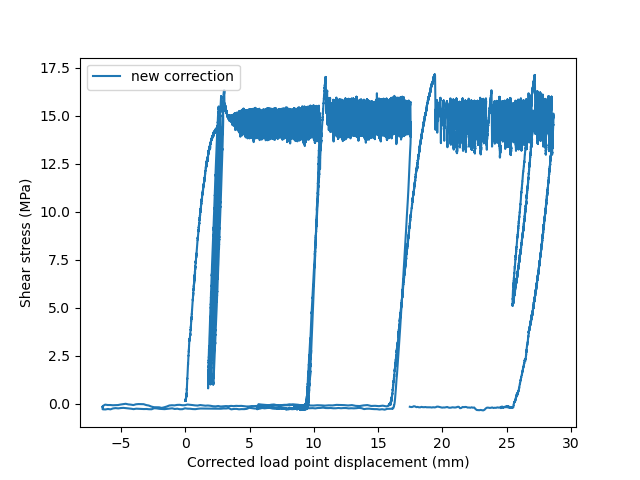

In [12]:
plt.figure()
#plt.plot(lp_disp_mm,shear_stress_MPa,label='not corrected')
plt.plot(ec_disp_mm,shear_stress_MPa,label='new correction')
#plt.plot(ec_disp_mm_old,shear_stress_MPa,label='old correction')
plt.xlabel('Corrected load point displacement (mm)')
plt.ylabel('Shear stress (MPa)')

plt.legend()

In [22]:
plt.plot(vertical_load)

In [13]:
#############  normal load ############ 
#### Normal load is applied at record

beg_row_h = 234

######################################
# zero the data
h_load = rp.zero(horizontal_load,beg_row_h)
# remove noise before load is applied 
h_load[:beg_row_h] = h_load[:beg_row_h]*0
# calculate stress for DDS 5x5
h_load =  h_load/(1000*0.0025)
h_load = h_load - offset_h
#add a small number to normal stress 
#so that we aren't dividing by 0 anywhere to calculate mu 
normal_stress_MPa = h_load + 1e-7

# rp.plot(df.Time,normal_stress_MPa,'Time [s]','Normal stress [MPa]')


# ### 4. Correct for elastic strech of the horizontal frame   
# 
# | Horizontal stiffness | applied load | k[MPa/mm] | calibration date | 
# | --- | --- | --- | --- |  
# | 386.12 [kN/mm] | < 50 [kN] | 125.363 [MPa/mm] | 19/11/2015 | 
# | 1283 [kN/mm] | > 50 [kN] | 416.558 [MPa/mm] | 19/11/2015 | 
# 
# Note:  
# 1. These values are calculated for a 5x5[cm] shear surface  
# 2. Stiffness is non linear at low applied loads  
# TO DO: implement a function that corrects for non-linear stiffness

In [14]:
horizontal_force = []
for i in range (0,len(h_load)):
    if h_load[i]>0:
        horizontal_force.append(h_load[i])
    else:
        horizontal_force.append(0)
horizontal_force = np.array(horizontal_force)


# Elastic correction for the stretch of the horizontal frame #
k_constant = 125.363 #[MPa/mm]
k = HorizontalStiffness(horizontal_force)

lt_ec_mm = NonlinearElasticCorrection(horizontal_force,-df.Horizontal_Displacement/1000,k)
lt_ec_mm_old = rp.ElasticCorrection(normal_stress_MPa,-df.Horizontal_Displacement/1000,k_constant)


# # 5. Calculate layer thickness   

# 
# Treat changes in horizontal displacement ($\Delta$h) as symmetric, take half of it for 1 layer.  
# Compaction = thinner layer  
# Thickness of DDS assembly with no gouge is:  
# 
# | small groove blocks | large groove blocks | PZT side blocks |  
# | --- | --- | --- |  
# |99.7 mm | 95 mm | 102.54 mm |
# 
# Bench thickness of initial layers & DDS is  --- [mm]  
# Bench thickness of 1 layer is: ---  [mm]
# 
# Thickness of spacers:  
# 
# | AA | BB | CC |  
# | --- | --- | --- |  
# |29.86 mm | -- mm | 6.12 mm |
# 
# The layer thickness is calculated as:  
# layer_thickness = (total layer thickness)-(Assembly)-(Spacers) / 2  
# 
# 
# Total thickness is 137.14 mm at rec #6068  
# layer tickness is  (137.14- 99.7 -29.86-6.12)/2  
# Layer thickness for one layer under load is 0.73 mm  


In [15]:
###########################################################
# insert rec number at which layer thickness was measured
rec_lt = 234
# insert calculated value at that point
val_lt = 3
###########################################################
# zero data
lt_ec_mm = rp.zero(lt_ec_mm,rec_lt)
lt_ec_mm_half = lt_ec_mm/2
lt_ec_mm1 = lt_ec_mm_half + val_lt

lt_ec_mm_old = rp.zero(lt_ec_mm_old,rec_lt)
lt_ec_mm_old_half = lt_ec_mm_old/2
lt_ec_mm_old1 = lt_ec_mm_old_half + val_lt


plt.plot(df.Time,lt_ec_mm1)
plt.plot(df.Time,lt_ec_mm_old1)


/tmp/ipykernel_6496/4041136055.py:19: RuntimeWarning: invalid value encountered in divide
  friction_na = shear_stress_MPa/normal_stress_MPa


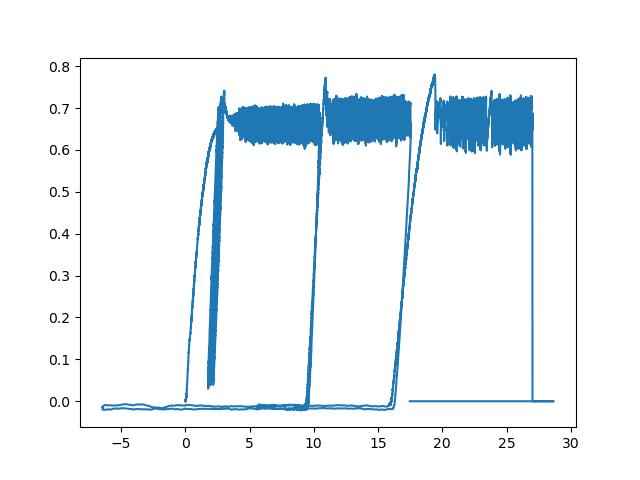

In [17]:
# default unit is [mm]
rgt_lt_mm = rp.rgt(lp_disp_mm,lt_ec_mm1)
# # 6. Calculate friction 

ob_disp = df.AUX_2
#ed_left_µm = df.AUX_3 *200
#ed_right_µm = df.AUX_4*200
#ed_vert_µm = df.AUX_5*200


plt.plot(df.Rec_n,ob_disp)

##### insert the last row 
end_row = int(1.91e6)
########################
shear_stress_MPa = shear_stress_MPa-shear_stress_MPa[0]
normal_stress_MPa = normal_stress_MPa-normal_stress_MPa[0]

friction_na = shear_stress_MPa/normal_stress_MPa
# remove the noise before and after vertical load
friction_na[:beg_row_v] = friction_na[:beg_row_v]*0
friction_na[end_row:] = friction_na[end_row:]*0
time_s  = df.Time
records_na = df.Rec_n
# # 7. Calculate shear strain 

# In[ ]:

##### calculate strain ####
shear_strain_na = rp.shear_strain(ec_disp_mm,lt_ec_mm1)
ob_disp = df.AUX_2
plt.figure()
plt.plot(ec_disp_mm,friction_na)

In [ ]:
%matplotlib widget
#plt.plot(time_s,shear_stress_MPa)
plt.figure()
plt.plot(ec_disp_mm,ob_disp)

In [18]:
# EXPORT DATA
exp_name ='s144'
data_out = [shear_stress_MPa,
            lp_disp_mm,
            ec_disp_mm, 
            #ob_disp,
            #ed_left_µm,
            #ed_right_µm,
            #ed_vert_µm,
            normal_stress_MPa,
            lt_ec_mm1, 
            rgt_lt_mm,
            friction_na,
            shear_strain_na, 
            time_s,
            records_na
          ]
            
rp.save_data(exp_name,data_out,callingLocals=locals())

Saving data

------------------------------------------------------
|                Name|           Unit|        Records|
-----------------------------------------------------
|    shear_stress_MPa|            MPa|        2057081|
|          lp_disp_mm|             mm|        2057081|
|          ec_disp_mm|             mm|        2057081|
|   normal_stress_MPa|            MPa|        2057081|
|           lt_ec_mm1|            mm1|        2057081|
|           rgt_lt_mm|             mm|        2057081|
|         friction_na|             na|        2057081|
|     shear_strain_na|             na|        2057081|
|              time_s|              s|        2057081|
|          records_na|             na|        2057081|
------------------------------------------------------
